In [1]:
%pip install qiskit==1.2.4
%pip install qiskit-aer==0.15.1
%pip install pylatexenc==2.10


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_gate
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import transpile 
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_counts
from qiskit.circuit import ControlledGate
from qiskit.circuit.classical import expr
import math 

# Implement the Bernstein-Vazirani algorithm from Lecture 15



In [20]:
# Utility functions

# A list of all bit strings of length n 

def bit_strings(n): 
    if n == 0: 
        return [ [] ]
    else:
        bs = bit_strings(n-1) 
        return list(map(lambda x: [0] + x, bs)) + list(map(lambda x: [1] + x, bs))

# A list of n zeroes with 1 in position m

def single_one(m,n): 
    x = [0] * n 
    x[m] = 1 
    return x 

# A list of n zeroes with -1 in position m

def single_minus_one(m,n): 
    x = [0] * n 
    x[m] = -1 
    return x 

# Working with n qubits, construct a unitary matrix from f 

def unitary_from_function(f,n):
    u = [] 
    bs = bit_strings(n) 
    for i in range(2**n):  
        if f(bs[i]) == 1:
            u = u + [single_minus_one(i,2**n)] 
        else:
            u = u + [single_one(i,2**n)] 
    return u 

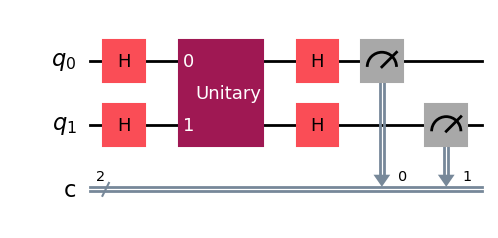

In [22]:
# In Bernstein-Vazirani, the aim is to find the bit-string s.
# We can define an arbitrary s and check that the algorithm finds it.

s = [ 0, 1, 1, 0 ] 


# Define f in terms of s, then define a unitary operator encoding f.

n = len(s) 

# f takes a bit-string of length n

def f(x): 
    r = 0 
    for i in range(n): 
        r = r + s[i]*x[i] 
    return r%2 

U = Operator(unitary_from_function(f,n))

# We are working with n qubits and we will need n classical bits for the measurement results.

bv = QuantumCircuit(n,n) 

# Apply H to all qubits to get a uniform superposition

for i in range(n): 
    bv.h(i) 

# Apply U

bv.append(U,range(n)) 

# Apply H to all qubits again

for i in range(n): 
    bv.h(i) 

# Measure all qubits

bv.measure(range(n),range(n)) 

# Check the circuit

bv.draw("mpl")




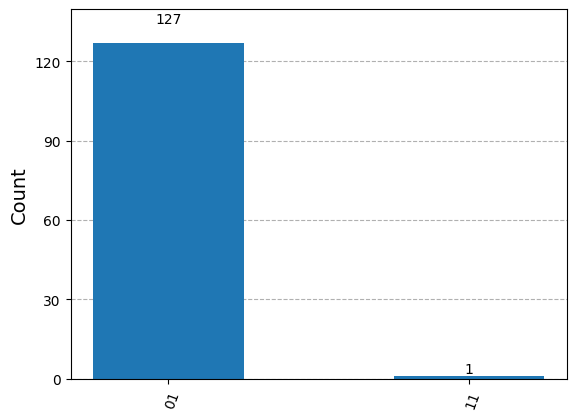

In [23]:
# Simulate and plot results

backend = GenericBackendV2(num_qubits=n, control_flow=True)
compiled = transpile(bv, backend)
job_sim = backend.run(compiled, shots=128)
result_sim = job_sim.result()
counts = result_sim.get_counts(compiled)
plot_histogram(counts)